In [20]:
import sys
import os
from pathlib import Path

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
# gdal
#pyproj 
%load_ext autoreload
%autoreload 2

sys.path.append(os.path.abspath("src"))

from sat_image_reader import SatImageReader
from classes_reader import ClassesReader


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
PATH_DATA = "../../../../tsi/data_education/fil_rouge_Airbus_2025/dynamic_earth_net/"

In [22]:
os.listdir(PATH_DATA)

['planet.29N',
 'planet.52N',
 'planet.35S',
 'dynamicearthnet_test_labels',
 'planet.46N',
 'planet.44N',
 'LICENSE',
 'labels',
 'planet.32N',
 'planet.13N',
 'planet.60S',
 'planet.31N',
 'planet.43N',
 'planet.35N',
 'planet.34N',
 'planet.48N',
 'planet.38S',
 'planet.36N',
 'planet.56S',
 'planet.47N',
 'planet.38N',
 'planet.20S',
 'planet.54S',
 'planet.20N',
 'planet.34S',
 'planet.18N',
 'sentinel1',
 'planet.50S',
 'planet.16N',
 'planet.19S',
 'planet.50N',
 'planet.11N',
 'planet.22S',
 'checksums.sha512',
 'planet.17N',
 'planet.10N',
 'sentinel2',
 'planet.33S',
 'planet.39N',
 'planet.54N',
 'planet.21S',
 'planet.49N',
 'planet.30N',
 'planet.15N',
 'planet.33N']

In [23]:
os.listdir(PATH_DATA + "planet.10N/planet/10N/")

os.listdir(PATH_DATA + "planet.10N/planet/10N/19E-211N/")

['1286_2921_13']

In [24]:
labels = os.listdir(PATH_DATA + "labels/labels/")


len(labels)

55

In [25]:
test_labels = os.listdir(PATH_DATA + "dynamicearthnet_test_labels")


In [26]:
print(labels)

print(test_labels)

['4397_4302_13_33S', '2415_3082_13_18N', '2832_4366_13_21S', '4838_3506_13_36N', '6752_3115_13_50N', '4856_4087_13_36N', '5989_3554_13_44N', '7026_3201_13-52N', '2850_4139_13_21S', '4791_3920_13_36N', '4780_3377_13_36N', '6466_3380_13_48N', '3002_4273_13_22S', '6688_3456_13_49N', '4169_3944_13_31N', '6468_3360_13_48N', '6824_4117_13_50S', '6381_3681_13_47N', '1700_3100_13_13N', '4421_3800_13_33N', '2624_4314_13_20S', '5111_4560_13-38S', '4806_3588_13_36N', '7513_4968_13_56S', '6475_3361_13_48N', '1487_3335_13_11N', '6810_3478_13_50N', '2235_3403_13-17N', '2006_3280_13_15N', '2470_5030_13_19S', '4426_3835_13_33N', '2459_4406_13-19S', '8077_5007_13_60S', '3998_3016_13_30N', '7367_5050_13-54S', '4881_3344_13_36N', '6730_3430_13_50N', '1417_3281_13_11N', '5863_3800_13_43N', '1311_3077_13_10N', '5125_4049_13_38N', '4240_3972_13_32N', '2065_3647_13_16N', '4223_3246_13_31N', '4254_2915_13_32N', '7312_3008_13_54N', '6204_3495_13-46N', '2029_3764_13_15N', '2697_3715_13_20N', '4768_4131_13_35S',

In [27]:
print(len(test_labels))
for x in test_labels:
    if '1286' in x:
        print("ok")

22
ok


In [28]:
def list_subdirectories(directory, max_depth=5):
    """Affiche les noms des sous-dossiers après 'planet/' jusqu'à une profondeur maximale."""
    counter = 0
    list_subdirectories = []
    try:
        for root, dirs, files in os.walk(directory):
            depth = root[len(directory):].count(os.sep)
            if depth < max_depth:
                for dir_name in dirs:
                    relative_path = os.path.join(root, dir_name)
            if depth == max_depth-1:
                if "planet/" and "PF-SR" in relative_path:
                    print(relative_path.split("planet/")[-1])
                    counter += 1
                    list_subdirectories.append(relative_path)
    except Exception as e:
        print(f"Erreur : {e}")
    print(f"Nombre de dossiers : {counter}")
    return list_subdirectories
        
list_subdirectories = list_subdirectories(PATH_DATA)

print(list_subdirectories)

29N/8E-36N/3830_3914_13/PF-SR
52N/20E-168N/7026_3201_13/PF-SR
35S/32E-409N/4768_4131_13/PF-SR
46N/19E-117N/6204_3495_13/PF-SR
44N/30E-106N/5989_3554_13/PF-SR
44N/15E-32N/5912_3937_13/PF-SR
44N/18E-76N/5926_3715_13/PF-SR
32N/8E-25N/4240_3972_13/PF-SR
32N/14E-212N/4254_2915_13/PF-SR
13N/19E-184N/1700_3100_13/PF-SR
60S/13E-245N/8077_5007_13/PF-SR
31N/15E-201N/4127_2991_13/PF-SR
31N/21E-30N/4169_3944_13/PF-SR
31N/30E-161N/4223_3246_13/PF-SR
43N/11E-97N/5754_3601_13/PF-SR
43N/32E-59N/5863_3800_13/PF-SR
43N/26E-52N/5830_3834_13/PF-SR
35N/16E-278N/4666_2369_13/PF-SR
34N/17E-147N/4553_3325_13/PF-SR
34N/28E-175N/4622_3159_13/PF-SR
48N/17E-141N/6468_3360_13/PF-SR
48N/17E-138N/6466_3380_13/PF-SR
48N/19E-141N/6475_3361_13/PF-SR
38S/19E-324N/5111_4560_13/PF-SR
36N/22E-1N/4856_4087_13/PF-SR
36N/13E-100N/4806_3588_13/PF-SR
36N/9E-138N/4780_3377_13/PF-SR
36N/19E-115N/4838_3506_13/PF-SR
36N/26E-144N/4881_3344_13/PF-SR
36N/9E-35N/4791_3920_13/PF-SR
56S/10E-251N/7513_4968_13/PF-SR
56S/10E-261N/7517_4908_

In [29]:
import pandas as pd

In [30]:
labels = labels + test_labels

df_labels = pd.DataFrame(labels, columns=["label"])
df_labels["key"] = df_labels["label"].apply(lambda x: "_".join(x.split("_")[:3]))


In [31]:
planet_paths = list_subdirectories

df_planet = pd.DataFrame(planet_paths, columns=["planet_path"])

# Extraire la clé
df_planet["key"] = df_planet["planet_path"].apply(lambda x: x.split("/")[-2])


In [32]:
df_merged = pd.merge(df_labels, df_planet, on="key", how="left")


In [33]:
df_merged.head()

,label,key,planet_path
0,4397_4302_13_33S,4397_4302_13,../../../../tsi/data_education/fil_rouge_Airbu...
1,2415_3082_13_18N,2415_3082_13,../../../../tsi/data_education/fil_rouge_Airbu...
2,2832_4366_13_21S,2832_4366_13,../../../../tsi/data_education/fil_rouge_Airbu...
3,4838_3506_13_36N,4838_3506_13,../../../../tsi/data_education/fil_rouge_Airbu...
4,6752_3115_13_50N,6752_3115_13,../../../../tsi/data_education/fil_rouge_Airbu...


In [36]:
img = SatImageReader(df_merged["planet_path"].iloc[5]+"/2018-05-01.tif")

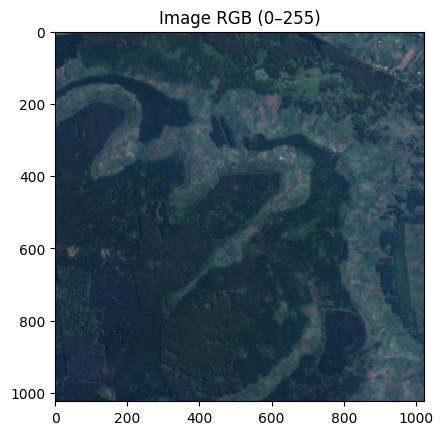

In [37]:
img.show_rgb()